In [1]:
import numpy, scipy, matplotlib.pyplot as plt, librosa, librosa.display, IPython.display

In [2]:
plt.rcParams['figure.figsize'] = (14, 4)

sample timespan: 6.058684807256236
sample resolution: 4.5351473922902495e-05
frame resolution: 0.011609977324263039


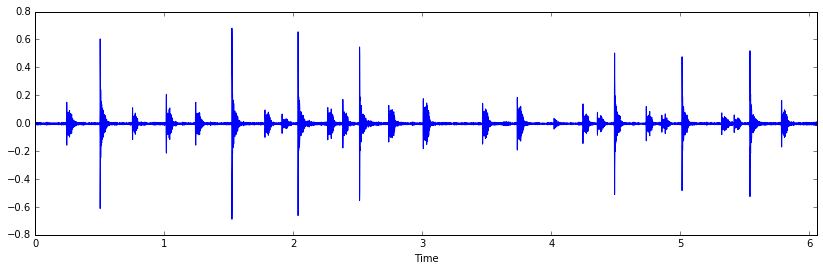

In [3]:
N_FFT = 2048
WIN_LENGTH = 2048 # <= N_FFT
HOP_LENGTH = 2048//8 # < WIN_LENGTH

x, sr = librosa.load('test2.wav')
t = librosa.samples_to_time(np.arange(len(x)), sr=sr)

print("sample timespan:", len(x)/sr)
print("sample resolution:", 1/sr)
print("frame resolution:", HOP_LENGTH/sr)

librosa.display.waveplot(x, sr)

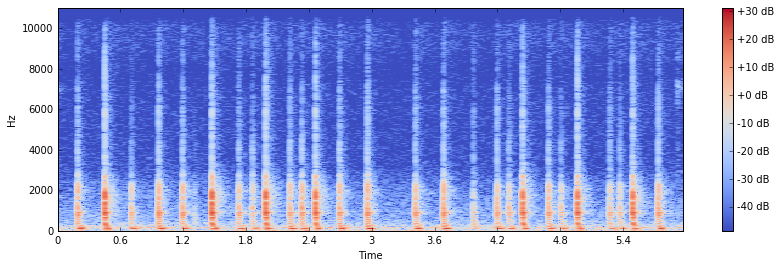

In [4]:
X = librosa.stft(x, n_fft=N_FFT, win_length=WIN_LENGTH, hop_length=HOP_LENGTH, center=False)
Xdb = librosa.amplitude_to_db(abs(X))
t_frames = librosa.frames_to_time(np.arange(X.shape[1]), sr=sr, hop_length=HOP_LENGTH, n_fft=N_FFT)

librosa.display.specshow(Xdb, sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

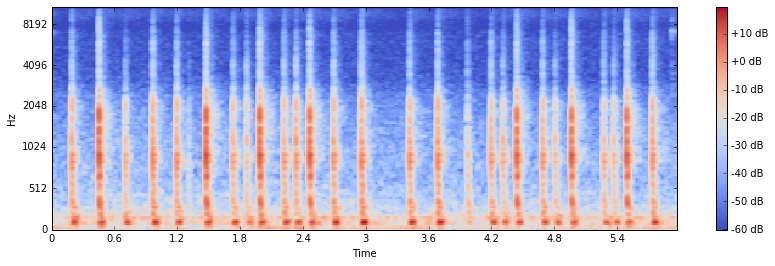

In [5]:
M = librosa.feature.melspectrogram(S=abs(X)**2, sr=sr, n_fft=N_FFT, win_length=WIN_LENGTH, hop_length=HOP_LENGTH)
Mdb = librosa.power_to_db(M)

librosa.display.specshow(Mdb, sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

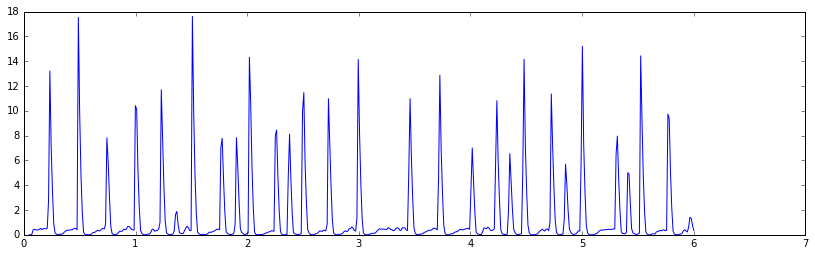

In [23]:
onset_env = librosa.onset.onset_strength(S=Mdb, sr=sr)
plt.plot(t_frames, onset_env)

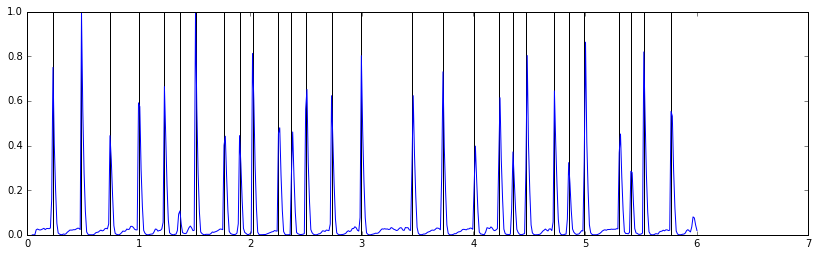

In [24]:
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env)
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=HOP_LENGTH, n_fft=N_FFT)
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=HOP_LENGTH, n_fft=N_FFT)

plt.plot(t_frames, onset_env)
plt.vlines(onset_times, ymin=0, ymax=1)

In [25]:
clicks = librosa.clicks(times=onset_times, length=len(x))
IPython.display.Audio(x + clicks, rate=sr)

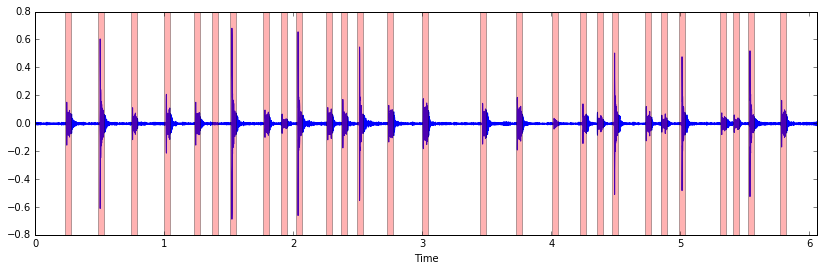

In [34]:
onset_block = [x[i:i+WIN_LENGTH//2] for i in onset_samples]

t_win = librosa.samples_to_time(WIN_LENGTH//2, sr=sr)
librosa.display.waveplot(x, sr)
for onset_t in onset_times:
    plt.axvspan(onset_t, onset_t+t_win, ymin=-1, ymax=1, facecolor='r', alpha=0.3)

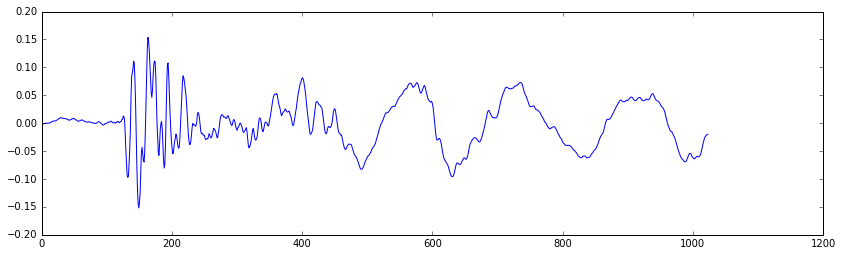

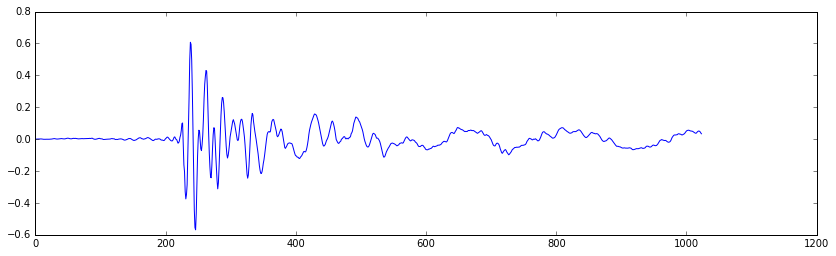

In [35]:
plt.plot(onset_block[0])
plt.show()
plt.plot(onset_block[1])
plt.show()

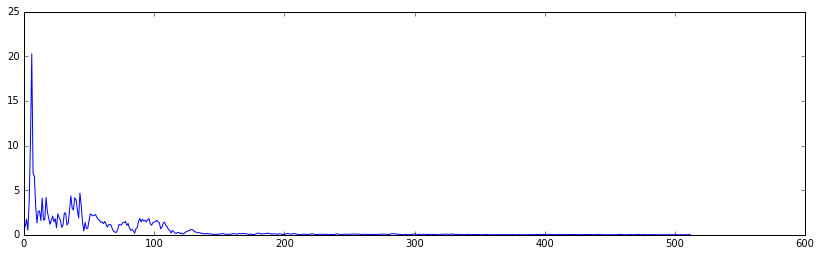

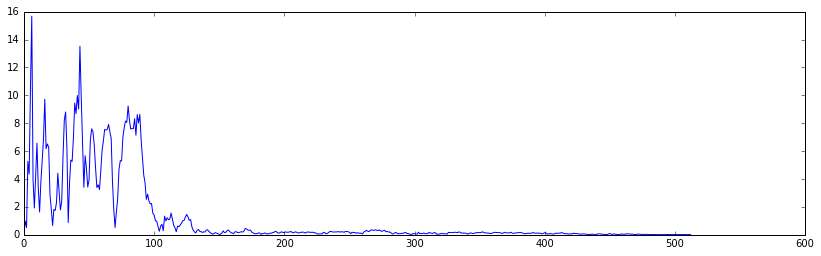

In [36]:
plt.plot(abs(numpy.fft.rfft(onset_block[0])))
plt.show()
plt.plot(abs(numpy.fft.rfft(onset_block[1])))
plt.show()

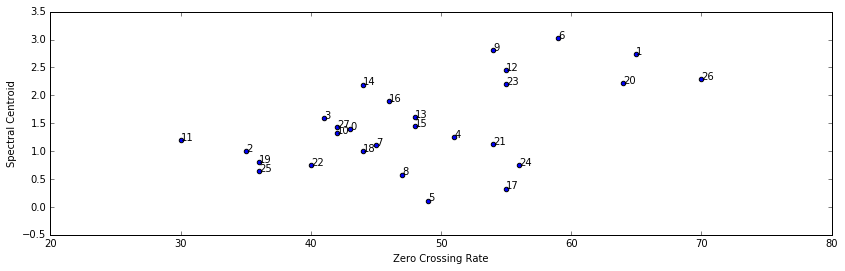

In [37]:
zcr = numpy.array([librosa.zero_crossings(xs).sum() for xs in onset_block])
cen = numpy.array([scipy.linalg.norm(xs) for xs in onset_block])

plt.scatter(zcr, cen)
ax = plt.gca()
for i in range(len(zcr)):
    ax.annotate(i, (zcr[i], cen[i]))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')